### Objective: This study analyzes the incidence of endometriomas and deep infiltrating endometriosis (DIE) across various anatomical sites, emphasizing their significance and implications. It also aims to promote non-invasive diagnostic alternatives to laparoscopy.

#### Methods: We studied 2,040 patients referred for pelvic endometriosis. After transvaginal sonography, MRI with contrast was used to identify affected sites. Two radiologists specializing in endometriosis assessed the MRIs independently. Notably, when no disease was found in the ovaries, radiologists often overlooked other sites. This study highlights the need for thorough examination of all areas, regardless of ovarian findings.

In [3]:
#Loading data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the Excel file
file_path = '/Users/ohajati/Desktop/2000CASES/DATA.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows to understand the structure
print(data.head())

  Rt_Ovary Ureters_and_Kidneys Retrocervical Ovarian_Fossa Cul_De_Sac  \
0        N                   N             N             N          N   
1        N                   N             N             N          N   
2        Y                   N             Y             Y          N   
3        Y                   N             N             Y          N   
4        Y                   N             N             N          N   

  Lt_Ovary Bladder Vagina US_Ligaments Rectal_wall  
0        N       N      N            N           N  
1        N       N      N            N           N  
2        Y       N      N            N           N  
3        Y       N      N            N           N  
4        N       N      N            Y           N  


In [4]:
#data preprocessing

# Convert categorical columns to numeric if necessary
# Example: Use LabelEncoder for categorical data
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
print(data.head())

   Rt_Ovary  Ureters_and_Kidneys  Retrocervical  Ovarian_Fossa  Cul_De_Sac  \
0         0                    0              0              0           0   
1         0                    0              0              0           0   
2         1                    0              1              1           0   
3         1                    0              0              1           0   
4         1                    0              0              0           0   

   Lt_Ovary  Bladder  Vagina  US_Ligaments  Rectal_wall  
0         0        0       0             0            0  
1         0        0       0             0            0  
2         1        0       0             0            0  
3         1        0       0             0            0  
4         0        0       0             1            0  


In [5]:
# Create a subset where both right and left ovaries show no disease
no_ovary_disease = data[(data['Rt_Ovary'] == 0) & (data['Lt_Ovary'] == 0)]

# Check the prevalence of disease in other sites
prevalence_other_sites = no_ovary_disease.drop(columns=['Rt_Ovary', 'Lt_Ovary']).mean()
print("Disease Prevalence in Other Sites (when both ovaries are negative):")
print(prevalence_other_sites)


Disease Prevalence in Other Sites (when both ovaries are negative):
Ureters_and_Kidneys    0.000000
Retrocervical          0.129032
Ovarian_Fossa          0.017921
Cul_De_Sac             0.034050
Bladder                0.005376
Vagina                 0.003584
US_Ligaments           0.186380
Rectal_wall            0.086022
dtype: float64


In [6]:
from scipy.stats import chi2_contingency

# Chi-Square Test for each site to check significance when both ovaries are negative
for site in no_ovary_disease.columns.drop(['Rt_Ovary', 'Lt_Ovary']):
    contingency_table = pd.crosstab(data['Rt_Ovary'] + data['Lt_Ovary'], data[site])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{site}: p-value = {p:.4f}")


Ureters_and_Kidneys: p-value = 0.0047
Retrocervical: p-value = 0.0000
Ovarian_Fossa: p-value = 0.0000
Cul_De_Sac: p-value = 0.0000
Bladder: p-value = 0.1366
Vagina: p-value = 0.0718
US_Ligaments: p-value = 0.0000
Rectal_wall: p-value = 0.0000


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the target: presence of disease in any non-ovary site
data['Any_Non_Ovary_Disease'] = data.drop(columns=['Rt_Ovary', 'Lt_Ovary']).max(axis=1)

# Use only non-ovary features for prediction
X = data.drop(columns=['Rt_Ovary', 'Lt_Ovary', 'Any_Non_Ovary_Disease'])
y = data['Any_Non_Ovary_Disease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00        62

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



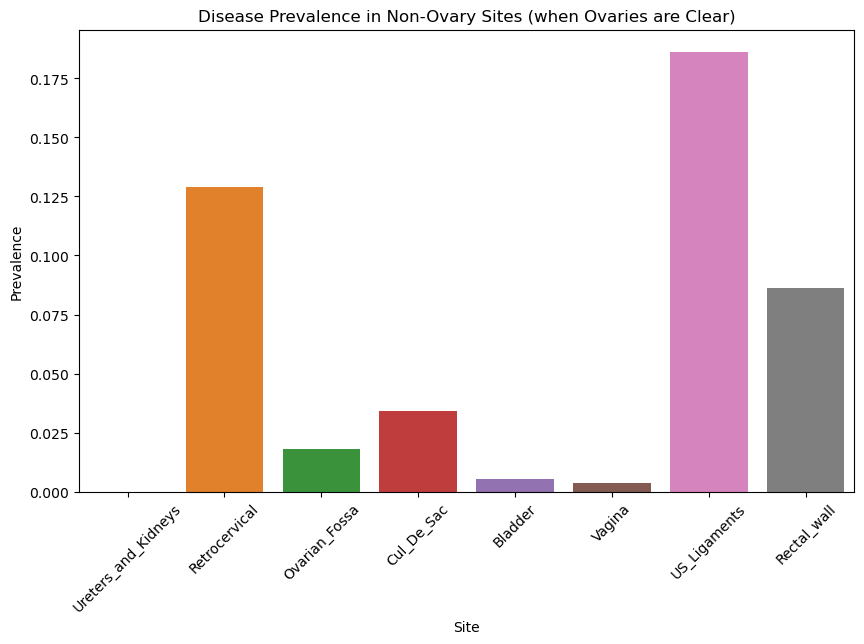

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the prevalence in non-ovary sites
plt.figure(figsize=(10, 6))
sns.barplot(x=prevalence_other_sites.index, y=prevalence_other_sites.values)
plt.title('Disease Prevalence in Non-Ovary Sites (when Ovaries are Clear)')
plt.ylabel('Prevalence')
plt.xlabel('Site')
plt.xticks(rotation=45)
plt.show()
